# Read Data

In [1]:
import numpy as np
import pandas as pd
import json
from collections import OrderedDict, defaultdict
from pathlib import Path
import os
ROOT = Path('devign')
ROOT.mkdir(exist_ok=True)
data = json.load(open(ROOT/'Devign.json'), object_pairs_hook=OrderedDict)

In [2]:
testIDs = list(map(int,open(os.path.join(ROOT,"test.txt")).readlines()))
trainIDs = list(map(int,open(os.path.join(ROOT,"train.txt")).readlines()))
validIDs = list(map(int,open(os.path.join(ROOT,"valid.txt")).readlines()))
len(testIDs),min(testIDs), min(trainIDs), min(validIDs)

(2732, 3, 0, 8)

In [3]:
details = []
with open('TransformationDetails-TEST.txt', 'r') as f:
    content = f.readlines()
    for row in content:
        details.append(list(row.split()))
len(details)

17199

## Histogram with number of transformations per function

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
transformedIDs = [c for a,b,c,d in details]
c = Counter(transformedIDs)

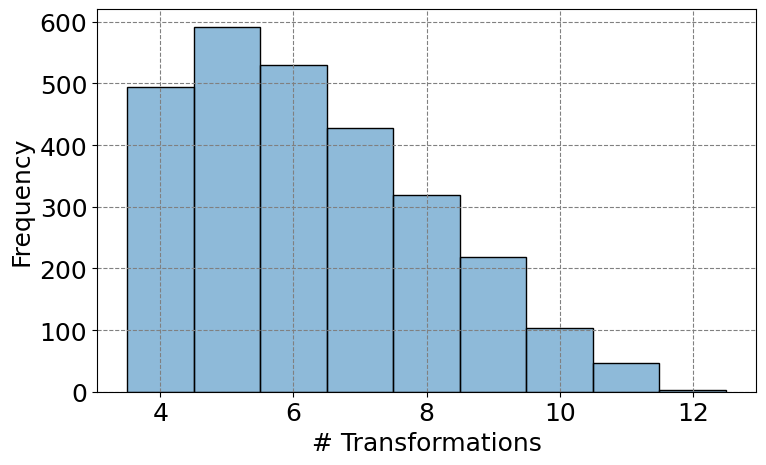

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 5))
plt.grid(color='gray', linestyle='dashed')
sns.histplot(c.values(),legend=False,bins=[x-0.5 for x in range(4,14)])
plt.xlabel('# Transformations')
plt.ylabel('Frequency')
plt.tight_layout()
# plt.savefig("images/transformationHist.png")
# plt.savefig("images/transformationHist.pdf")
plt.show()

## Translate methods to a more readable format

In [7]:
translateMethod = {'LimitsOfML4Vuln-transformations':'LimitsOfML4Vuln',
                'Code-Imitator-transformations':'Code-Imitator',
                'RoPGen-transformations':'RoPGen'}
tf = {"tf_12":"remove_newline_tabs",
     "tf_4":"insert_unexecuted_code",
      "tf_5":"insert_comment",
      "tf_7":"insert_whitespace",
      "tf_9":"remove_comments"
     }
def getName(method,transform):
    repl = ["_transformations","_1","_2","_3"]
    method = translateMethod[method]
    if "tf" in transform:
        transform = tf[transform]
    if transform == "Definition_and_initialization_of_multiple_variables_with_same_types":
        transform = "Initialization_multiple_variables"
    transform_name = method+"-"+ transform
    for x in repl:
        transform_name = transform_name.replace(x,"")
    return transform_name

# Read predictions on TEST set

In [8]:
f = open("Results/vulberta-TEST.txt").readlines()
origLabel = dict()
origPrediction = dict()
for i,l in enumerate(f):
    content = l.split()
    origLabel[testIDs[i]] = content[1]
    origPrediction[testIDs[i]] = content[0]

In [9]:
f = open("Results/plbart-TEST.txt").readlines()
origLabel_PLBART = dict()
origPrediction_PLBART = dict()
for i,l in enumerate(f):
    if l.startswith("Accuracy"):break
    content = l.split()
    origLabel_PLBART[testIDs[i]] = content[1]
    origPrediction_PLBART[testIDs[i]] = content[0]

# Read predictions from transformation - VULBERTA
Determine label behaviour

In [11]:
f = open("Results/vulberta-transformed-TEST.txt").readlines()
labelPredictions = defaultdict(list)
for i,l in enumerate(f):
    content = l.split()
    getID = int(details[i][2])
    origPred = origPrediction[getID]
    transformName = getName(details[i][0],details[i][1])
    labelPredictions[transformName].append(str(origPred)+str(content[0]))

In [12]:
labelInfo = []
for k,v in labelPredictions.items():
    l = len(v)
    labelInfo.append((k,v.count("00")/l, v.count("10")/l,v.count("01")/l, v.count("11")/l))
df = pd.DataFrame(labelInfo, columns=['transformation', "0->0", "1->0","0->1","1->1"])
df.head()

,transformation,0->0,1->0,0->1,1->1
0,LimitsOfML4Vuln-remove_newline_tabs,0.387262,0.220717,0.252928,0.139092
1,LimitsOfML4Vuln-insert_comment,0.409956,0.230234,0.230234,0.129575
2,LimitsOfML4Vuln-insert_unexecuted_code,0.569180,0.313324,0.071010,0.046486
3,LimitsOfML4Vuln-insert_whitespace,0.409956,0.230234,0.230234,0.129575
4,LimitsOfML4Vuln-remove_comments,0.425802,0.228934,0.224459,0.120805


# PLBART

In [13]:
f_PLBART = open("Results/plbart-transformed-TEST.txt").readlines()
labelPredictions_PLBART = defaultdict(list)
for i,l in enumerate(f_PLBART):
    if l.startswith("Accuracy"):break
    content = l.split()
    getID = int(details[i][2])
    origPred = origPrediction_PLBART[getID]
    transformName = getName(details[i][0],details[i][1])
    labelPredictions_PLBART[transformName].append(str(origPred)+str(content[0]))

In [14]:
labelInfo_PLBART = []
for k,v in labelPredictions_PLBART.items():
    l = len(v)
    labelInfo_PLBART.append((k,v.count("00")/l, v.count("10")/l,v.count("01")/l, v.count("11")/l))
df_PLBART = pd.DataFrame(labelInfo_PLBART, columns=['transformation', "0->0", "1->0","0->1","1->1"])
df_PLBART.head()

,transformation,0->0,1->0,0->1,1->1
0,LimitsOfML4Vuln-remove_newline_tabs,0.275622,0.256955,0.256955,0.210469
1,LimitsOfML4Vuln-insert_comment,0.280015,0.260981,0.252562,0.206442
2,LimitsOfML4Vuln-insert_unexecuted_code,0.310395,0.293924,0.222182,0.173499
3,LimitsOfML4Vuln-insert_whitespace,0.274524,0.258053,0.258053,0.209370
4,LimitsOfML4Vuln-remove_comments,0.256525,0.252051,0.278151,0.213274


# Multiplot

[Text(0, 0, '2732'),
 Text(0, 0, '2732'),
 Text(0, 0, '2732'),
 Text(0, 0, '2732'),
 Text(0, 0, '1341'),
 Text(0, 0, '17'),
 Text(0, 0, '701'),
 Text(0, 0, '3'),
 Text(0, 0, '17'),
 Text(0, 0, '17'),
 Text(0, 0, '1639'),
 Text(0, 0, '3'),
 Text(0, 0, '15'),
 Text(0, 0, '1697'),
 Text(0, 0, '513'),
 Text(0, 0, '308')]

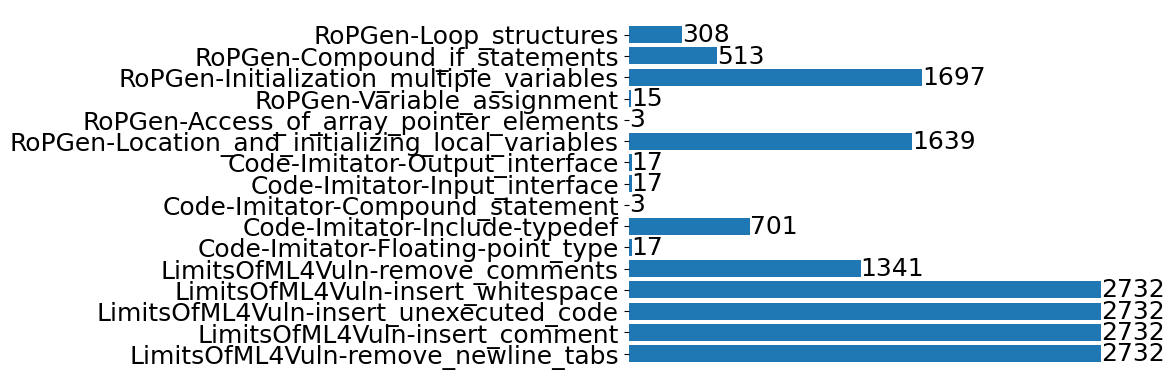

In [15]:
fig, ax = plt.subplots()
bars = ax.barh(list(transformC.keys()), transformC.values())
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.bar_label(bars)
#plt.barh(list(transformC.keys()),transformC.values() )

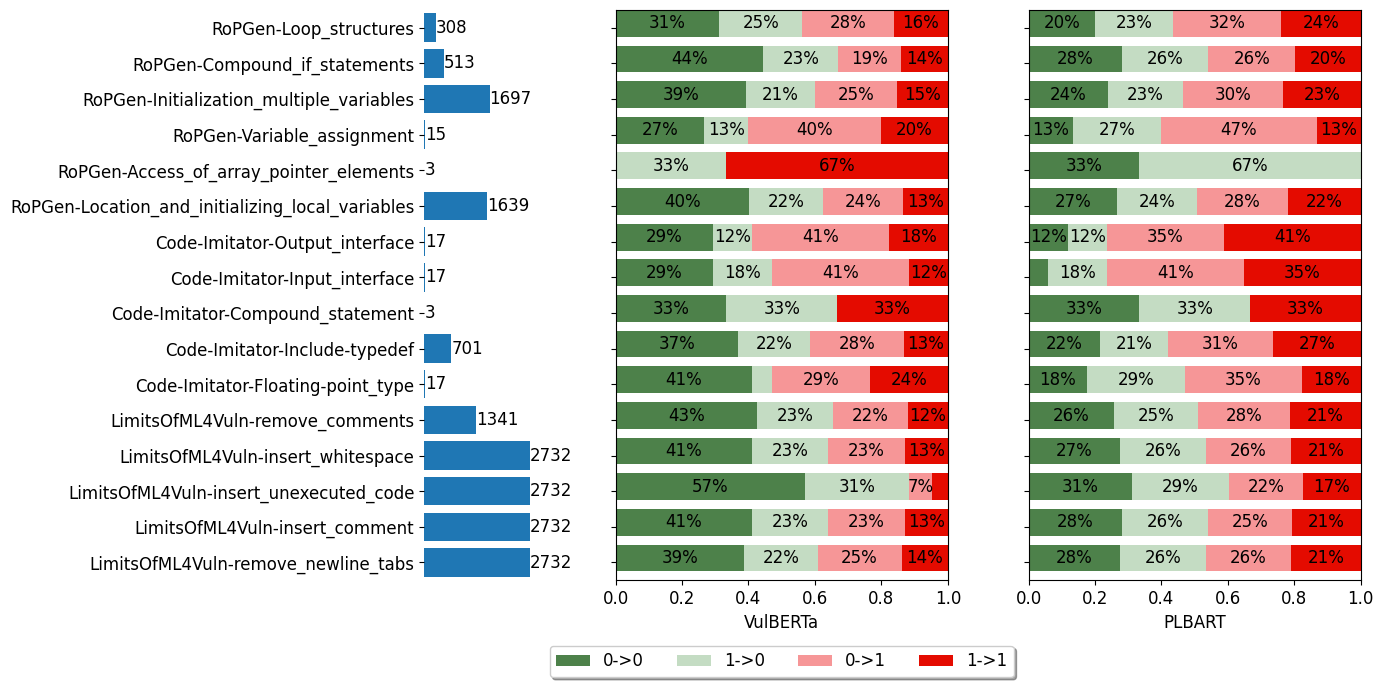

In [17]:
plt.rcParams.update({'font.size':12})
colors = ["#4d814a","#c4dcc3","#f69697","#e40b00"]
f, axs = plt.subplots(1, 3, figsize=(14, 7),sharey=True,width_ratios=[1,3,3])


axs[0].barh(list(transformC.keys()), transformC.values())
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].get_xaxis().set_ticks([])
axs[0].bar_label(bars)


bars_vulberta = df.plot(x="transformation", y=["0->0", "1->0","0->1","1->1"], kind="barh", rot=0, 
        stacked=True,color=colors,xlabel="VulBERTa",ax=axs[1]) #figsize=(10,8),
for bar in bars_vulberta.containers:
    for b in bar:
        b.set_height(0.75)  
axs[1].legend().set_visible(False)
axs[1].set_xlim(0,1)

for c in axs[1].containers:
    # Optional: if the segment is small or 0, customize the labels
    labels = [format(v.get_width(), ".0%") if v.get_width() > 0.07 else '' for v in c]
    # remove the labels parameter if it's not needed for customized labels
    axs[1].bar_label(c, labels=labels, label_type='center')

bars_plbart = df_PLBART.plot(x="transformation", y=["0->0", "1->0","0->1","1->1"], kind="barh", rot=0, 
        stacked=True,color=colors,xlabel="PLBART",ax=axs[2]) 
for bar in bars_plbart.containers:
    for b in bar:
        b.set_height(0.75)  
axs[2].legend().set_visible(False)
axs[2].set_xlim(0,1)


for c in axs[2].containers:

    # Optional: if the segment is small or 0, customize the labels
    labels = [format(v.get_width(), ".0%") if v.get_width() > 0.07 else '' for v in c]

    # remove the labels parameter if it's not needed for customized labels
    axs[2].bar_label(c, labels=labels, label_type='center')

handles, labels = axs[2].get_legend_handles_labels()
axs[1].legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True, ncol=5)
plt.tight_layout()
# plt.savefig("images/combined-NEW2.png")
# plt.savefig("images/combined-NEW2.pdf")


